In [4]:
import glob
import pandas as pd
import datetime

# get data file names
path =r'../csv'
# ！！！CAUTION: need minutes to process all files！！！
filenames = glob.glob(path + "/*.csv")

# date_time_obj = datetime.datetime.strptime(date_time_str, '%d-%m-%Y')

# print('Date:', date_time_obj.date())

startDate = datetime.datetime.strptime('01-01-2005', '%d-%m-%Y')
endDate = datetime.datetime.strptime('01-01-2021', '%d-%m-%Y')

df_empty = pd.DataFrame(columns=[])
for filename in filenames:
    stockName = filename.split('/')[2].split('.csv')[0]
    #print(stockName)
    
    df_tmp = pd.read_csv(filename)
    df_tmp['avg'] = (df_tmp['High'] + df_tmp['Low']) / 2
    date_time_obj = datetime.datetime.strptime(df_tmp.iloc[0, 0], '%d-%m-%Y')
    #print(date_time_obj)
    if startDate < date_time_obj:
        i = 0
    else :
#         dummy algo, find the first row that date >= startDate
        i = 0
        while i < len(df_tmp.index) and datetime.datetime.strptime(df_tmp.iloc[i, 0], '%d-%m-%Y') < startDate:
            i += 1
#         concatenate df_tmp[i:] to df_empty
        if i < len(df_tmp.index):
#             print(i)
            df_tmp_open_filtered = df_tmp.iloc[i:]
            df_tmp_open_filtered = df_tmp_open_filtered.reset_index()
#             df_tmp_filtered.index = Series(range(1, len(df_tmp_filtered))   
            df_empty['Date'] = df_tmp_open_filtered['Date']
            df_empty[stockName] = df_tmp_open_filtered['avg']
                                           


In [5]:
df_empty

,Date,CSCO,TROW,ISRG,NVR,MRO,BA,GILD,EQIX,MDT,...,WM,DOV,FTI,CRM,WAT,IEX,BWA,LRCX,NWL,BLK
0,03-01-2005,19.440001,31.012500,13.033333,746.750000,11.027794,51.584999,8.692500,42.745001,49.480000,...,29.745000,27.885962,5.792411,4.173750,46.335001,26.670000,13.43125,28.389999,24.245000,76.559998
1,04-01-2005,18.965000,30.340000,12.413333,735.964996,10.872704,50.515001,8.600000,42.814999,49.270000,...,29.485000,27.708323,5.686384,4.103750,45.450001,26.066668,13.10375,27.065000,23.865000,75.599998
2,05-01-2005,18.665000,29.987500,12.115000,722.500000,10.756386,50.340000,8.215000,41.665001,49.020000,...,29.110000,27.346342,5.571056,4.336250,45.160000,25.496666,12.91250,26.355000,23.305000,75.224998
3,06-01-2005,18.710000,30.110000,12.291667,717.250000,10.768316,50.730000,8.468750,41.674999,49.325001,...,28.905000,26.803370,5.596168,4.462500,45.530001,25.373333,12.87500,25.870000,23.125000,78.395000
4,07-01-2005,18.800000,30.075000,12.418334,708.825012,10.908494,50.474998,8.406250,41.404999,50.120001,...,28.750000,26.501719,5.563616,4.422500,45.970001,25.099999,12.86875,25.730000,23.270000,79.474998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,16-03-2021,49.465000,172.680000,731.505005,4684.520020,11.585000,259.095009,63.674999,675.575012,118.980003,...,122.669998,134.090004,8.450000,215.084999,272.660004,200.315002,49.54500,549.759979,25.855000,721.575012
4078,17-03-2021,49.250000,172.955002,720.884979,4615.320068,11.480000,258.644989,64.045000,660.875000,119.040001,...,120.900002,136.270004,8.270000,212.834999,268.810013,197.519997,49.03500,544.089996,25.764999,725.154999
4079,18-03-2021,49.045000,173.610001,707.315002,4512.729980,11.095000,261.049995,64.300001,646.279999,119.235001,...,120.480000,137.320000,8.105000,209.889999,267.940002,198.575005,48.88500,544.575012,26.255000,731.205017
4080,19-03-2021,48.770000,172.154999,705.054993,4466.659912,10.870000,255.095001,64.120001,654.839996,117.529999,...,121.779999,135.909996,7.845000,210.910004,267.745010,199.209999,48.43000,541.794983,26.290000,727.080017


<AxesSubplot:title={'center':'Stock Prices'}, xlabel='Day from 01-01-2005', ylabel='Price'>

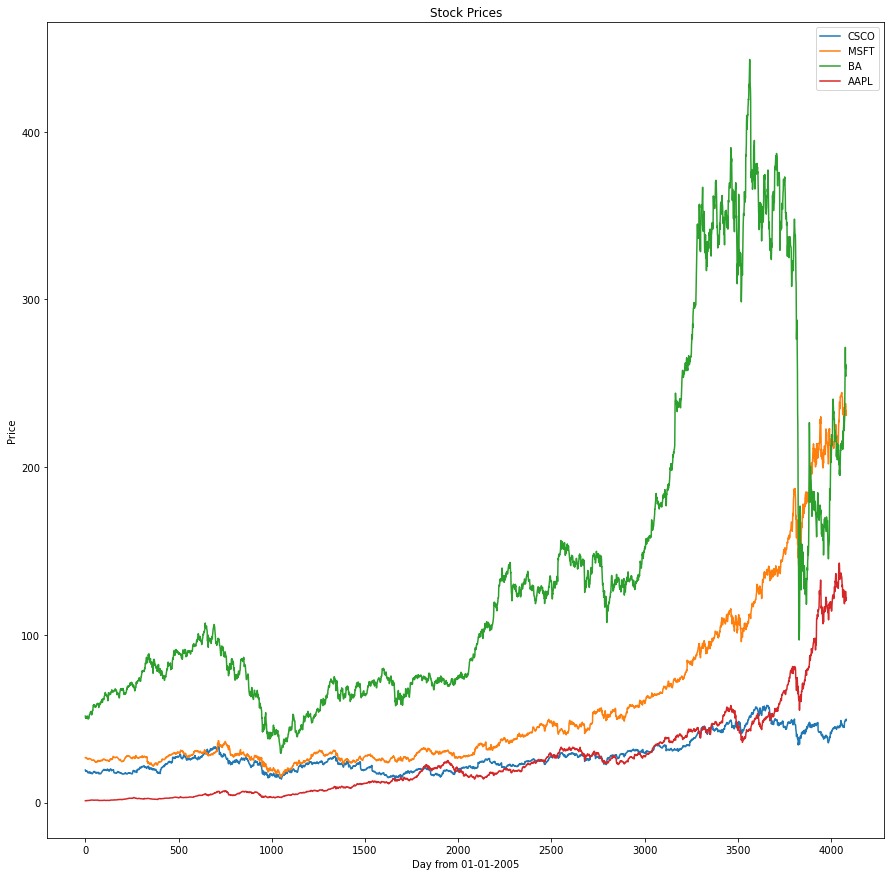

In [24]:
df_empty[['CSCO','MSFT', 'BA', 'AAPL']].plot(xlabel="Day from 01-01-2005", ylabel='Price',title="Stock Prices", figsize=(15,15))

In [44]:
pd.DataFrame(df_empty.iloc[0:100])

,sp500/csv/CSCO.csv Date,sp500/csv/CSCO.csv Open,sp500/csv/CSCO.csv Close,sp500/csv/CSCO.csv Low,sp500/csv/CSCO.csv High,sp500/csv/CSCO.csv Volume,sp500/csv/CSCO.csv Adjusted Close,sp500/csv/TROW.csv Date,sp500/csv/TROW.csv Open,sp500/csv/TROW.csv Close,...,sp500/csv/NWL.csv High,sp500/csv/NWL.csv Volume,sp500/csv/NWL.csv Adjusted Close,sp500/csv/BLK.csv Date,sp500/csv/BLK.csv Open,sp500/csv/BLK.csv Close,sp500/csv/BLK.csv Low,sp500/csv/BLK.csv High,sp500/csv/BLK.csv Volume,sp500/csv/BLK.csv Adjusted Close
0,03-01-2005,19.420000,19.320000,19.270000,19.610001,56725600,14.448113,03-01-2005,31.230000,30.830000,...,24.549999,1706900,14.724539,03-01-2005,77.010002,75.779999,75.769997,77.349998,25900,52.010536
1,04-01-2005,19.379999,18.559999,18.540001,19.389999,106241900,13.879755,04-01-2005,30.844999,29.969999,...,24.129999,1234800,14.491594,04-01-2005,75.769997,75.550003,74.949997,76.250000,24500,51.852680
2,05-01-2005,18.469999,18.570000,18.450001,18.879999,66100500,13.887231,05-01-2005,29.905001,29.844999,...,23.510000,1095500,14.191222,05-01-2005,75.699997,74.849998,74.750000,75.699997,24600,51.372242
3,06-01-2005,18.670000,18.850000,18.559999,18.860001,63790900,14.096630,06-01-2005,29.785000,30.129999,...,23.299999,1257800,14.228000,06-01-2005,76.250000,80.000000,76.209999,80.580002,300600,54.906906
4,07-01-2005,18.920000,18.719999,18.620001,18.980000,54415000,13.999409,07-01-2005,30.180000,29.905001,...,23.400000,1079400,14.240260,07-01-2005,80.000000,78.339996,77.949997,81.000000,147300,53.767574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19-05-2005,19.230000,19.379999,19.180000,19.430000,46846000,14.492977,19-05-2005,29.590000,29.745001,...,22.629999,731700,13.957426,19-05-2005,78.339996,78.239998,77.669998,78.839996,42000,53.901134
96,20-05-2005,19.389999,19.469999,19.280001,19.510000,34181700,14.560287,20-05-2005,29.790001,29.764999,...,22.730000,755100,14.037855,20-05-2005,78.360001,78.209999,77.550003,78.400002,49300,53.880459
97,23-05-2005,19.350000,19.549999,19.330000,19.590000,49768500,14.620111,23-05-2005,29.820000,29.860001,...,23.020000,1566600,14.167782,23-05-2005,78.250000,78.050003,78.000000,78.849998,55200,53.770252
98,24-05-2005,19.480000,20.000000,19.400000,20.010000,86130000,14.956637,24-05-2005,29.860001,29.639999,...,23.000000,2240600,14.118283,24-05-2005,78.000000,77.500000,76.650002,78.050003,92400,53.391335
